# 워드 클라우드(단어구름) 실습
### amueller의 wordcloud package를 이용한 mask를 활용한 wordcloud 만들기! [참고](https://github.com/kimyoungjin06/wordcloud/blob/master/Make_the_Word_Cloud.ipynb)

## 1. Package import & font, mask, message setup!

- 이 코드는 mask를 다루는 부분, font를 다루는 부분, word를 다루는 부분으로 나뉜다. 먼저 필요한 패키지들을 불러오는데, numpy와 random, palettable은 font 색 설정할 때, PIL은 mask 이미지를 처리할 때, wordcloud는 이 모든 것을 이용해서 word cloud를 그릴 때 이용된다.

- 아래에서 딱히 어려운 점은 없고, color_func가 여기서는 Dark2_8이라는 palette를 이용해서 색을 만들어낸다. Palette를 바꾸고 싶다면 이 부분을 바꾸면 될 것!

- *PIL은 python3에서는 Pillow로 설치하고 PIL로 사용하면 된다.

- *mask로 쓸 이미지는 png파일로 우리가 단어를 배치할 공간만 그림이 존재해야 한다. 나머지 공간엔 흰색이 아니라 아예 이미지가 없는 png파일이 필요하다.

In [20]:
## 오류가 나면 모듈을 설치해야 합니다.
## 아마도 아래와 같은 모듈 오류가 있을 겁니다.
# wordcloud 오류, palettable 오류
# 아래 명령어를 복사해서 anaconda prompt에서 수행하세요.
# conda install -c conda-forge wordcloud
# pip install palettable\

import numpy as np
import random
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# color_func 함수, Dark2_8이라는 pallette를 이용하여 색을 만들어냄.
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

# 한글 폰트 지정
font = "NanumPen"
font_path = "%s.ttf" % font

# 아이콘 지정
icon = "dove" 
icon_path = "%s.png" % icon

### 데이터 입력

In [22]:
# 연설문1
# 아래 KoreaSummit_Moon.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("dae.txt", 'r', encoding='euc-kr')
message_of_dae = f.read()
print(message_of_dae)
f.close()

국왕 폐하,

왕세자와 공주 등 왕실가족 여러분,

노르웨이 노벨 위원회 위원 여러분,

그리고 내외 귀빈과 신사 숙녀 여러분!

노르웨이는 인권과 평화의 성지입니다. 노벨평화상은 세계 모든 인류에게 평화를 위해 헌신하도록 격려하는 숭고한 메시지입니다. 저에게 오늘 내려주신 영예에 대해서 다시없는 영광으로 생각하고 감사를 드립니다. 그러나 저는 한국에서 민주주의와 인권, 그리고 민족의 통일을 위해 기꺼이 희생한 수많은 동지들과 국민들을 생각할 때 오늘의 영광은 제가 차지할 것이 아니라 그분들에게 바쳐져야 마땅하다고 생각합니다. 

또한 우리 국민의 민주화와 남북화해를 위한 노력을 아낌없이 지원해 주신 세계의 모든 나라와 벗들에게도 진심으로 감사드립니다. 

오늘 이 노벨평화상을 저에게 주신 이유 중의 하나는 지난 6월에 있었던 남북정상회담과 그 이후에 전개되고 있는 남북 화해협력 과정에 대한 평가라고 알고 있습니다. 

존경하는 여러분! 

노벨 위원회가 긍정적으로 평가해준 최근의 남북관계에 대해 몇 말씀 드리겠습니다. 저는 지난 6월에 북한의 김정일 국방위원장과 역사적인 남북정상회담을 가졌습니다. 북한에 갈 때 여러 가지 걱정이 많았지만 오직 민족의 화해와 한반도의 평화를 위한 일념으로 출발했던 것입니다. 회담이 잘 된다는 보장도 없었습니다. 남북은 반세기 동안 분단된 가운데 3년에 걸친 전쟁을 치렀으며 휴전선의 철책을 사이에 놓고 불신과 증오로 50년을 살아왔습니다. 

이러한 남북관계를 평화와 협력의 방향으로 돌리기 위해 저는 98년 2월 대통령에 취임한 이후 햇볕정책을 일관되게 주장했습니다. 그것은 첫째, 북에 의한 적화통일을 용납하지 않는다. 둘째, 남에 의한 북한의 흡수통일도 결코 기도하지 않는다. 셋째, 남북은 오로지 평화적으로 공존하고 평화적으로 교류협력하자는 것이었습니다. 완전한 통일에 이르기까지는 얼마가 걸리더라도 서로 안심하고 하나가 될 수 있을 때까지 기다려야 한다는 것이 저의 생각이었습니다. 

북한은 처음에는 우리의 햇볕정책이 북한을 

In [23]:
# 연설문2
# 아래 speech.txt를 본인이 저장한 파일 이름으로 바꾸세요.
#-*- coding: utf-8 -*-
f = open("KoreaSummit_Kim.txt", 'r', encoding='euc-kr')
message_of_kim = f.read()
print(message_of_kim)
f.close()

친애하는 여러분 북과 남, 해외의 동포 형제 자매들. 오늘 저와 문재인 대통령은 분열의 비극과 통일의 열망이 응결되어 있는 이곳 판문점에서 역사적인 책임감과 사명감을 안고 첫 회담을 가지었습니다. 

나는 먼저 수뇌상봉과 회담의 성공적인 개최를 위하여 많은 노고를 바치신 문재인 대통령과 남측 관계자 여러분들께 깊은 사의를 표합니다.

또한 우리들을 위해 온갖 정성과 노력을 다 기울이며 성대히 맞이하여 주고 한 혈육, 한 형제, 한민족의 따뜻한 정을 다해준 남녘 동포들에게 감사의 인사를 드립니다.

북과 남이 오늘 이렇게 다시 두 손을 맞잡기까지 참으로 긴 시간이 흘렀고 우리 모두는 너무 오랫동안 이 만남을 한마음으로 기다려왔습니다.

정작 마주 서고 보니 북과 남은 역시 서로 갈라져 살 수 없는 한 혈육이며 그 어느 이웃에도 비길 수 없는 동족이라는 것을 가슴 뭉클하게 절감하게 되었습니다.

이토록 지척에 살고 있는 우리는 대결하여 싸워야 할 이(異)민족이 아니라 단합하여 화목하게 살아야 할 한 핏줄을 이룬 한민족입니다.

하루빨리 온 겨레가 마음 놓고 평화롭게 잘 살아갈 길을 열고 우리 민족의 새로운 미래를 개척해 나갈 결심을 안고 나는 오늘 판문점 분리선을 넘어 여기에 왔습니다.

저와 문재인 대통령은 우리의 상봉을 간절히 바라고 열렬히 지지 성원 하여준 북과 남 온 겨레의 성원과 기대를 무겁게 받아들이고 북남 인민들이 절실히 바라는 문제 해결을 위해 많은 의제들을 진지하게 논의하였습니다.

무엇보다도 온 겨레가 전쟁 없는 평화로운 땅에서 번영과 행복을 누리는 새 시대를 열어나갈 확고한 의지를 같이하고 이를 위한 실천적 대책들을 합의하였습니다.

그리고 이미 채택된 북남 선언들과 모든 합의들을 철저히 이행해 나가는 것으로 관계 개선과 발전의 전환적 국면을 열어나가기로 하였습니다. 

저와 문재인 대통령은 방금 오늘 회담에서 합의된 의제들과 그 구체적 조치들을 반영한 조선반도의 평화와 번영, 통일을 위한 판문점 선언을 채택하고 서명하였습니다.

우리가 오늘 

## 2. Load the mask, font coloring, generate word cloud!
- 먼저 icon에 image를 불러오고, mask를 RGB type으로 icon과 같은 사이즈로 전부 (255,255,255)값 (아마 흰색?)으로 만들어내고, 이 (255,255,255)가 이미지가 채워지지 않는 부분을 의미한다. (?Image.new를 참고!), 그리고 나서 이 mask에 아까 불러온 icon의 형상을 붙여넣는다. 그리고 나서 이를 nparray로 만든다.

- 이제 만들어놓은 mask와 불러놨던 font를 이용하여 WordCloud함수를 이용해 wordcloud를 만들어내고, WordCloud.recolor를 이용해서 아까 만들어놓은 color_func()를 사용해 불러온 palette를 이용해 색을 입힌다. 그리고 저장하면 끝!



# 남북정상회담 두 정상의 대화문 워드 클라우드
[연설문 시각화](https://github.com/eventia/CandSpeech/blob/master/wordcloud.py)

In [24]:
# 연설문 1번 전처리
message_of_dae = message_of_dae.split('\n\n')
message_of_dae

['국왕 폐하,',
 '왕세자와 공주 등 왕실가족 여러분,',
 '노르웨이 노벨 위원회 위원 여러분,',
 '그리고 내외 귀빈과 신사 숙녀 여러분!',
 '노르웨이는 인권과 평화의 성지입니다. 노벨평화상은 세계 모든 인류에게 평화를 위해 헌신하도록 격려하는 숭고한 메시지입니다. 저에게 오늘 내려주신 영예에 대해서 다시없는 영광으로 생각하고 감사를 드립니다. 그러나 저는 한국에서 민주주의와 인권, 그리고 민족의 통일을 위해 기꺼이 희생한 수많은 동지들과 국민들을 생각할 때 오늘의 영광은 제가 차지할 것이 아니라 그분들에게 바쳐져야 마땅하다고 생각합니다. ',
 '또한 우리 국민의 민주화와 남북화해를 위한 노력을 아낌없이 지원해 주신 세계의 모든 나라와 벗들에게도 진심으로 감사드립니다. ',
 '오늘 이 노벨평화상을 저에게 주신 이유 중의 하나는 지난 6월에 있었던 남북정상회담과 그 이후에 전개되고 있는 남북 화해협력 과정에 대한 평가라고 알고 있습니다. ',
 '존경하는 여러분! ',
 '노벨 위원회가 긍정적으로 평가해준 최근의 남북관계에 대해 몇 말씀 드리겠습니다. 저는 지난 6월에 북한의 김정일 국방위원장과 역사적인 남북정상회담을 가졌습니다. 북한에 갈 때 여러 가지 걱정이 많았지만 오직 민족의 화해와 한반도의 평화를 위한 일념으로 출발했던 것입니다. 회담이 잘 된다는 보장도 없었습니다. 남북은 반세기 동안 분단된 가운데 3년에 걸친 전쟁을 치렀으며 휴전선의 철책을 사이에 놓고 불신과 증오로 50년을 살아왔습니다. ',
 '이러한 남북관계를 평화와 협력의 방향으로 돌리기 위해 저는 98년 2월 대통령에 취임한 이후 햇볕정책을 일관되게 주장했습니다. 그것은 첫째, 북에 의한 적화통일을 용납하지 않는다. 둘째, 남에 의한 북한의 흡수통일도 결코 기도하지 않는다. 셋째, 남북은 오로지 평화적으로 공존하고 평화적으로 교류협력하자는 것이었습니다. 완전한 통일에 이르기까지는 얼마가 걸리더라도 서로 안심하고 하나가 될 수 있을 때까지 기다려야 한다는 것이 저의 생각이었습

In [25]:


# 연설문 2번 전처리
message_of_kim = message_of_kim.split('\n\n')
message_of_kim

['친애하는 여러분 북과 남, 해외의 동포 형제 자매들. 오늘 저와 문재인 대통령은 분열의 비극과 통일의 열망이 응결되어 있는 이곳 판문점에서 역사적인 책임감과 사명감을 안고 첫 회담을 가지었습니다. ',
 '나는 먼저 수뇌상봉과 회담의 성공적인 개최를 위하여 많은 노고를 바치신 문재인 대통령과 남측 관계자 여러분들께 깊은 사의를 표합니다.',
 '또한 우리들을 위해 온갖 정성과 노력을 다 기울이며 성대히 맞이하여 주고 한 혈육, 한 형제, 한민족의 따뜻한 정을 다해준 남녘 동포들에게 감사의 인사를 드립니다.',
 '북과 남이 오늘 이렇게 다시 두 손을 맞잡기까지 참으로 긴 시간이 흘렀고 우리 모두는 너무 오랫동안 이 만남을 한마음으로 기다려왔습니다.',
 '정작 마주 서고 보니 북과 남은 역시 서로 갈라져 살 수 없는 한 혈육이며 그 어느 이웃에도 비길 수 없는 동족이라는 것을 가슴 뭉클하게 절감하게 되었습니다.',
 '이토록 지척에 살고 있는 우리는 대결하여 싸워야 할 이(異)민족이 아니라 단합하여 화목하게 살아야 할 한 핏줄을 이룬 한민족입니다.',
 '하루빨리 온 겨레가 마음 놓고 평화롭게 잘 살아갈 길을 열고 우리 민족의 새로운 미래를 개척해 나갈 결심을 안고 나는 오늘 판문점 분리선을 넘어 여기에 왔습니다.',
 '저와 문재인 대통령은 우리의 상봉을 간절히 바라고 열렬히 지지 성원 하여준 북과 남 온 겨레의 성원과 기대를 무겁게 받아들이고 북남 인민들이 절실히 바라는 문제 해결을 위해 많은 의제들을 진지하게 논의하였습니다.',
 '무엇보다도 온 겨레가 전쟁 없는 평화로운 땅에서 번영과 행복을 누리는 새 시대를 열어나갈 확고한 의지를 같이하고 이를 위한 실천적 대책들을 합의하였습니다.',
 '그리고 이미 채택된 북남 선언들과 모든 합의들을 철저히 이행해 나가는 것으로 관계 개선과 발전의 전환적 국면을 열어나가기로 하였습니다. ',
 '저와 문재인 대통령은 방금 오늘 회담에서 합의된 의제들과 그 구체적 조치들을 반영한 조선반도의 평화와 번영, 통일을 위

In [26]:
# 연설문 1번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus1 = tf_vectorizer.fit(message_of_dae)
tf_bow1 = tf_vectorizer.fit_transform(message_of_dae)
tf_bow1

<42x966 sparse matrix of type '<class 'numpy.int64'>'
	with 1222 stored elements in Compressed Sparse Row format>

In [27]:
# 연설문 2번 빈도 계산
# except 1-letter word
## min_df: integer(frequency), float(ratio)
tf_vectorizer = CountVectorizer(min_df = 0.001, token_pattern=r'\w{2,}')

tf_corpus2 = tf_vectorizer.fit(message_of_kim)
tf_bow2 = tf_vectorizer.fit_transform(message_of_kim)
tf_bow2

<24x392 sparse matrix of type '<class 'numpy.int64'>'
	with 481 stored elements in Compressed Sparse Row format>

In [28]:
# 연설문 1 
# check vocabulary in TDM
print(len(tf_corpus1.vocabulary_))
print(len(tf_corpus1.get_feature_names()))
tf_vectorizer.get_feature_names()

966
966


['가속화될',
 '가슴',
 '가운데',
 '가지고',
 '가지었습니다',
 '가진',
 '간절한',
 '간절히',
 '갈라져',
 '감사의',
 '감사합니다',
 '같이하고',
 '개선과',
 '개척해',
 '개최를',
 '것으로',
 '것을',
 '것이며',
 '것입니다',
 '겨레가',
 '겨레의',
 '격려를',
 '결과를',
 '결실을',
 '결실이',
 '결심을',
 '계시는',
 '고통이',
 '관계',
 '관계자',
 '관심과',
 '구체적',
 '국면을',
 '굳은',
 '그리고',
 '그의',
 '기다려왔습니다',
 '기다리는',
 '기대를',
 '기대에',
 '기록되지',
 '기쁨을',
 '기울이며',
 '기자',
 '기초하여',
 '긴밀히',
 '길로',
 '길에는',
 '길을',
 '깊은',
 '꿈과',
 '끝까지',
 '끝없는',
 '나가는',
 '나가면',
 '나가야',
 '나간다면',
 '나갈',
 '나는',
 '나아갑시다',
 '날들을',
 '남녘',
 '남은',
 '남의',
 '남이',
 '남측',
 '내가',
 '너무',
 '넘어',
 '노고를',
 '노력과',
 '노력을',
 '노력해',
 '논의하였습니다',
 '놓고',
 '놓아야',
 '놓음으로써',
 '누리게',
 '누리는',
 '다녀간',
 '다시',
 '다해',
 '다해준',
 '단합과',
 '단합하여',
 '닫겨',
 '대결하여',
 '대의를',
 '대책들을',
 '대통령과',
 '대통령은',
 '더욱',
 '도전을',
 '동족이라는',
 '동포',
 '동포들에게',
 '되고',
 '되기를',
 '되어',
 '되었습니다',
 '되풀이되지',
 '된다면',
 '됩니다',
 '드립니다',
 '따뜻한',
 '땅에서',
 '또한',
 '뜨거운',
 '뜻과',
 '마련되었던',
 '마음',
 '마음으로',
 '마주',
 '마주하고',
 '만남과',
 '만남에',
 '만남을',
 '많은',
 '맞이하여',
 '맞잡기까지',
 '맞추며',
 '맺어지도록',
 '맺을',
 '먼

In [29]:
# 연설문 2
# check vocabulary in TDM
print(len(tf_corpus2.vocabulary_))
print(len(tf_corpus2.get_feature_names()))
tf_vectorizer.get_feature_names()

392
392


['가속화될',
 '가슴',
 '가운데',
 '가지고',
 '가지었습니다',
 '가진',
 '간절한',
 '간절히',
 '갈라져',
 '감사의',
 '감사합니다',
 '같이하고',
 '개선과',
 '개척해',
 '개최를',
 '것으로',
 '것을',
 '것이며',
 '것입니다',
 '겨레가',
 '겨레의',
 '격려를',
 '결과를',
 '결실을',
 '결실이',
 '결심을',
 '계시는',
 '고통이',
 '관계',
 '관계자',
 '관심과',
 '구체적',
 '국면을',
 '굳은',
 '그리고',
 '그의',
 '기다려왔습니다',
 '기다리는',
 '기대를',
 '기대에',
 '기록되지',
 '기쁨을',
 '기울이며',
 '기자',
 '기초하여',
 '긴밀히',
 '길로',
 '길에는',
 '길을',
 '깊은',
 '꿈과',
 '끝까지',
 '끝없는',
 '나가는',
 '나가면',
 '나가야',
 '나간다면',
 '나갈',
 '나는',
 '나아갑시다',
 '날들을',
 '남녘',
 '남은',
 '남의',
 '남이',
 '남측',
 '내가',
 '너무',
 '넘어',
 '노고를',
 '노력과',
 '노력을',
 '노력해',
 '논의하였습니다',
 '놓고',
 '놓아야',
 '놓음으로써',
 '누리게',
 '누리는',
 '다녀간',
 '다시',
 '다해',
 '다해준',
 '단합과',
 '단합하여',
 '닫겨',
 '대결하여',
 '대의를',
 '대책들을',
 '대통령과',
 '대통령은',
 '더욱',
 '도전을',
 '동족이라는',
 '동포',
 '동포들에게',
 '되고',
 '되기를',
 '되어',
 '되었습니다',
 '되풀이되지',
 '된다면',
 '됩니다',
 '드립니다',
 '따뜻한',
 '땅에서',
 '또한',
 '뜨거운',
 '뜻과',
 '마련되었던',
 '마음',
 '마음으로',
 '마주',
 '마주하고',
 '만남과',
 '만남에',
 '만남을',
 '많은',
 '맞이하여',
 '맞잡기까지',
 '맞추며',
 '맺어지도록',
 '맺을',
 '먼

In [30]:
# 연설문 1
# frequency count
tf_word_sum1 = tf_bow1.toarray().sum(axis=0)
tf_word_name1 = tf_corpus1.get_feature_names()
tf_word_dict1 = {}

for i in range(len(tf_word_sum1)):
    tf_word_dict1[tf_word_name1[i]] = tf_word_sum1[i]
    
print(tf_corpus1.get_feature_names())
tf_word_sum1

['10월에', '1973년', '1980년', '1민족', '21세기는', '21세기에', '2년반', '2독립정부의', '2월', '2천', '2천년이나', '2체제', '30만톤과', '3년에', '3천년', '40년을', '4강에', '4개의', '4대', '50년', '50년을', '50만톤을', '5백년', '6개월', '6년의', '6월에', '8월', '98년', 'asem정상회의에서', '가르치고', '가서', '가운데', '가장', '가져다', '가졌습니다', '가지', '가지고', '가치인', '감사드립니다', '감사를', '감사합니다', '감시', '감시하는', '감옥살이를', '감옥에서', '갑니다', '강력한', '강조되었습니다', '강조했습니다', '강하게', '같이', '개발도상국의', '개선만으로는', '개선하고', '개선할', '개인에', '개인적인', '개혁은', '개혁을', '거기에는', '걱정이', '걸리더라도', '걸쳐서', '걸친', '것도', '것으로서', '것은', '것을', '것이', '것이다', '것이었습니다', '것임을', '것입니다', '격려하는', '겪어야', '결국', '결단이었습니다', '결박하고', '결정적인', '결코', '경악했었습니다', '경쟁력', '경제발전과', '경제의', '경제협력에', '계속', '계속되는', '계속될', '계속하고', '계속해서', '계신다는', '고관들의', '고난의', '고비를', '곳에', '공공', '공무원을', '공산권의', '공산권이', '공자의', '공작선으로', '공존하고', '공주', '공포에', '과정에', '관계개선을', '관계는', '관계를', '관계와', '관광의', '교류', '교류에', '교류협력하자는', '교리가', '구원하는', '구출되었던', '구현하는', '국가간의', '국가경제는', '국내뿐만', '국민과', '국민들을', '국민에', '국민의', '국민주권사상보다', '국방위원장과', '국방장관회담이', '국왕', '국정철학', '군

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  2,  1,  1,  1,  1,  1,  1,
        1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  2,  5,
        4,  1,  1,  1, 12,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        1,  1,  1,  2,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  3,  1,  1,  3,  1,  1,  1,  3,  1,  1,  1,  1,  1,  2,  1,  1,
        1,  1,  2,  1,  3,  1,  1,  1,  1,  7,  1,  1,  9,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [31]:
# 연설문 2
# frequency count
tf_word_sum2 = tf_bow2.toarray().sum(axis=0)
tf_word_name2 = tf_corpus2.get_feature_names()
tf_word_dict2 = {}

for i in range(len(tf_word_sum2)):
    tf_word_dict2[tf_word_name2[i]] = tf_word_sum2[i]
    
print(tf_corpus2.get_feature_names())
tf_word_sum2

['가속화될', '가슴', '가운데', '가지고', '가지었습니다', '가진', '간절한', '간절히', '갈라져', '감사의', '감사합니다', '같이하고', '개선과', '개척해', '개최를', '것으로', '것을', '것이며', '것입니다', '겨레가', '겨레의', '격려를', '결과를', '결실을', '결실이', '결심을', '계시는', '고통이', '관계', '관계자', '관심과', '구체적', '국면을', '굳은', '그리고', '그의', '기다려왔습니다', '기다리는', '기대를', '기대에', '기록되지', '기쁨을', '기울이며', '기자', '기초하여', '긴밀히', '길로', '길에는', '길을', '깊은', '꿈과', '끝까지', '끝없는', '나가는', '나가면', '나가야', '나간다면', '나갈', '나는', '나아갑시다', '날들을', '남녘', '남은', '남의', '남이', '남측', '내가', '너무', '넘어', '노고를', '노력과', '노력을', '노력해', '논의하였습니다', '놓고', '놓아야', '놓음으로써', '누리게', '누리는', '다녀간', '다시', '다해', '다해준', '단합과', '단합하여', '닫겨', '대결하여', '대의를', '대책들을', '대통령과', '대통령은', '더욱', '도전을', '동족이라는', '동포', '동포들에게', '되고', '되기를', '되어', '되었습니다', '되풀이되지', '된다면', '됩니다', '드립니다', '따뜻한', '땅에서', '또한', '뜨거운', '뜻과', '마련되었던', '마음', '마음으로', '마주', '마주하고', '만남과', '만남에', '만남을', '많은', '맞이하여', '맞잡기까지', '맞추며', '맺어지도록', '맺을', '먼저', '모두', '모두는', '모든', '모아', '무겁게', '무릎을', '무엇보다도', '문도', '문재인', '문제', '문화를', '뭉클하게', '미래로', '미래를', '민족만대의', '민족의', '민족이', 

array([ 1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,
        1,  5,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        3,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  1,  1,  1,  2,  1,  3,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,
        1,  2,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  1,  2,  1,  1,  5,  1,  1,  1,  1,  1,  4,  1,  1,  1,
        1,  1,  1,  5,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,
        1,  1,  2,  1,  1,  1,  1,  1,  1, 10,  2,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  1,  4

In [32]:
# 연설문 1
# 단어별 글자수 확인
tf_word_dict1

{'10월에': 1,
 '1973년': 1,
 '1980년': 1,
 '1민족': 1,
 '21세기는': 1,
 '21세기에': 1,
 '2년반': 1,
 '2독립정부의': 1,
 '2월': 1,
 '2천': 1,
 '2천년이나': 1,
 '2체제': 1,
 '30만톤과': 1,
 '3년에': 1,
 '3천년': 1,
 '40년을': 1,
 '4강에': 1,
 '4개의': 1,
 '4대': 1,
 '50년': 1,
 '50년을': 1,
 '50만톤을': 1,
 '5백년': 1,
 '6개월': 1,
 '6년의': 1,
 '6월에': 2,
 '8월': 1,
 '98년': 2,
 'asem정상회의에서': 1,
 '가르치고': 1,
 '가서': 1,
 '가운데': 1,
 '가장': 1,
 '가져다': 1,
 '가졌습니다': 1,
 '가지': 1,
 '가지고': 2,
 '가치인': 1,
 '감사드립니다': 1,
 '감사를': 1,
 '감사합니다': 1,
 '감시': 1,
 '감시하는': 1,
 '감옥살이를': 1,
 '감옥에서': 1,
 '갑니다': 1,
 '강력한': 1,
 '강조되었습니다': 1,
 '강조했습니다': 1,
 '강하게': 1,
 '같이': 2,
 '개발도상국의': 1,
 '개선만으로는': 1,
 '개선하고': 1,
 '개선할': 1,
 '개인에': 1,
 '개인적인': 1,
 '개혁은': 1,
 '개혁을': 2,
 '거기에는': 1,
 '걱정이': 1,
 '걸리더라도': 1,
 '걸쳐서': 1,
 '걸친': 1,
 '것도': 1,
 '것으로서': 1,
 '것은': 2,
 '것을': 5,
 '것이': 4,
 '것이다': 1,
 '것이었습니다': 1,
 '것임을': 1,
 '것입니다': 12,
 '격려하는': 1,
 '겪어야': 1,
 '결국': 1,
 '결단이었습니다': 1,
 '결박하고': 1,
 '결정적인': 1,
 '결코': 1,
 '경악했었습니다': 1,
 '경쟁력': 1,
 '경제발전과': 1,
 '경제의': 1,
 '경제협력에': 1,
 '계

In [33]:
# 연설문 2
# 단어별 글자수 확인
tf_word_dict2

{'가속화될': 1,
 '가슴': 2,
 '가운데': 1,
 '가지고': 1,
 '가지었습니다': 1,
 '가진': 1,
 '간절한': 1,
 '간절히': 1,
 '갈라져': 1,
 '감사의': 1,
 '감사합니다': 1,
 '같이하고': 1,
 '개선과': 1,
 '개척해': 1,
 '개최를': 1,
 '것으로': 1,
 '것을': 3,
 '것이며': 1,
 '것입니다': 5,
 '겨레가': 2,
 '겨레의': 1,
 '격려를': 1,
 '결과를': 1,
 '결실을': 1,
 '결실이': 1,
 '결심을': 1,
 '계시는': 1,
 '고통이': 1,
 '관계': 1,
 '관계자': 1,
 '관심과': 1,
 '구체적': 1,
 '국면을': 1,
 '굳은': 1,
 '그리고': 3,
 '그의': 1,
 '기다려왔습니다': 1,
 '기다리는': 1,
 '기대를': 2,
 '기대에': 1,
 '기록되지': 1,
 '기쁨을': 1,
 '기울이며': 1,
 '기자': 1,
 '기초하여': 1,
 '긴밀히': 1,
 '길로': 1,
 '길에는': 1,
 '길을': 1,
 '깊은': 1,
 '꿈과': 1,
 '끝까지': 1,
 '끝없는': 1,
 '나가는': 1,
 '나가면': 1,
 '나가야': 1,
 '나간다면': 1,
 '나갈': 2,
 '나는': 2,
 '나아갑시다': 1,
 '날들을': 1,
 '남녘': 1,
 '남은': 2,
 '남의': 1,
 '남이': 3,
 '남측': 1,
 '내가': 1,
 '너무': 1,
 '넘어': 1,
 '노고를': 1,
 '노력과': 1,
 '노력을': 1,
 '노력해': 1,
 '논의하였습니다': 1,
 '놓고': 1,
 '놓아야': 1,
 '놓음으로써': 1,
 '누리게': 1,
 '누리는': 1,
 '다녀간': 1,
 '다시': 2,
 '다해': 1,
 '다해준': 1,
 '단합과': 1,
 '단합하여': 1,
 '닫겨': 1,
 '대결하여': 1,
 '대의를': 1,
 '대책들을': 1,
 '대통령과': 1,
 '대통령은

### 시각화

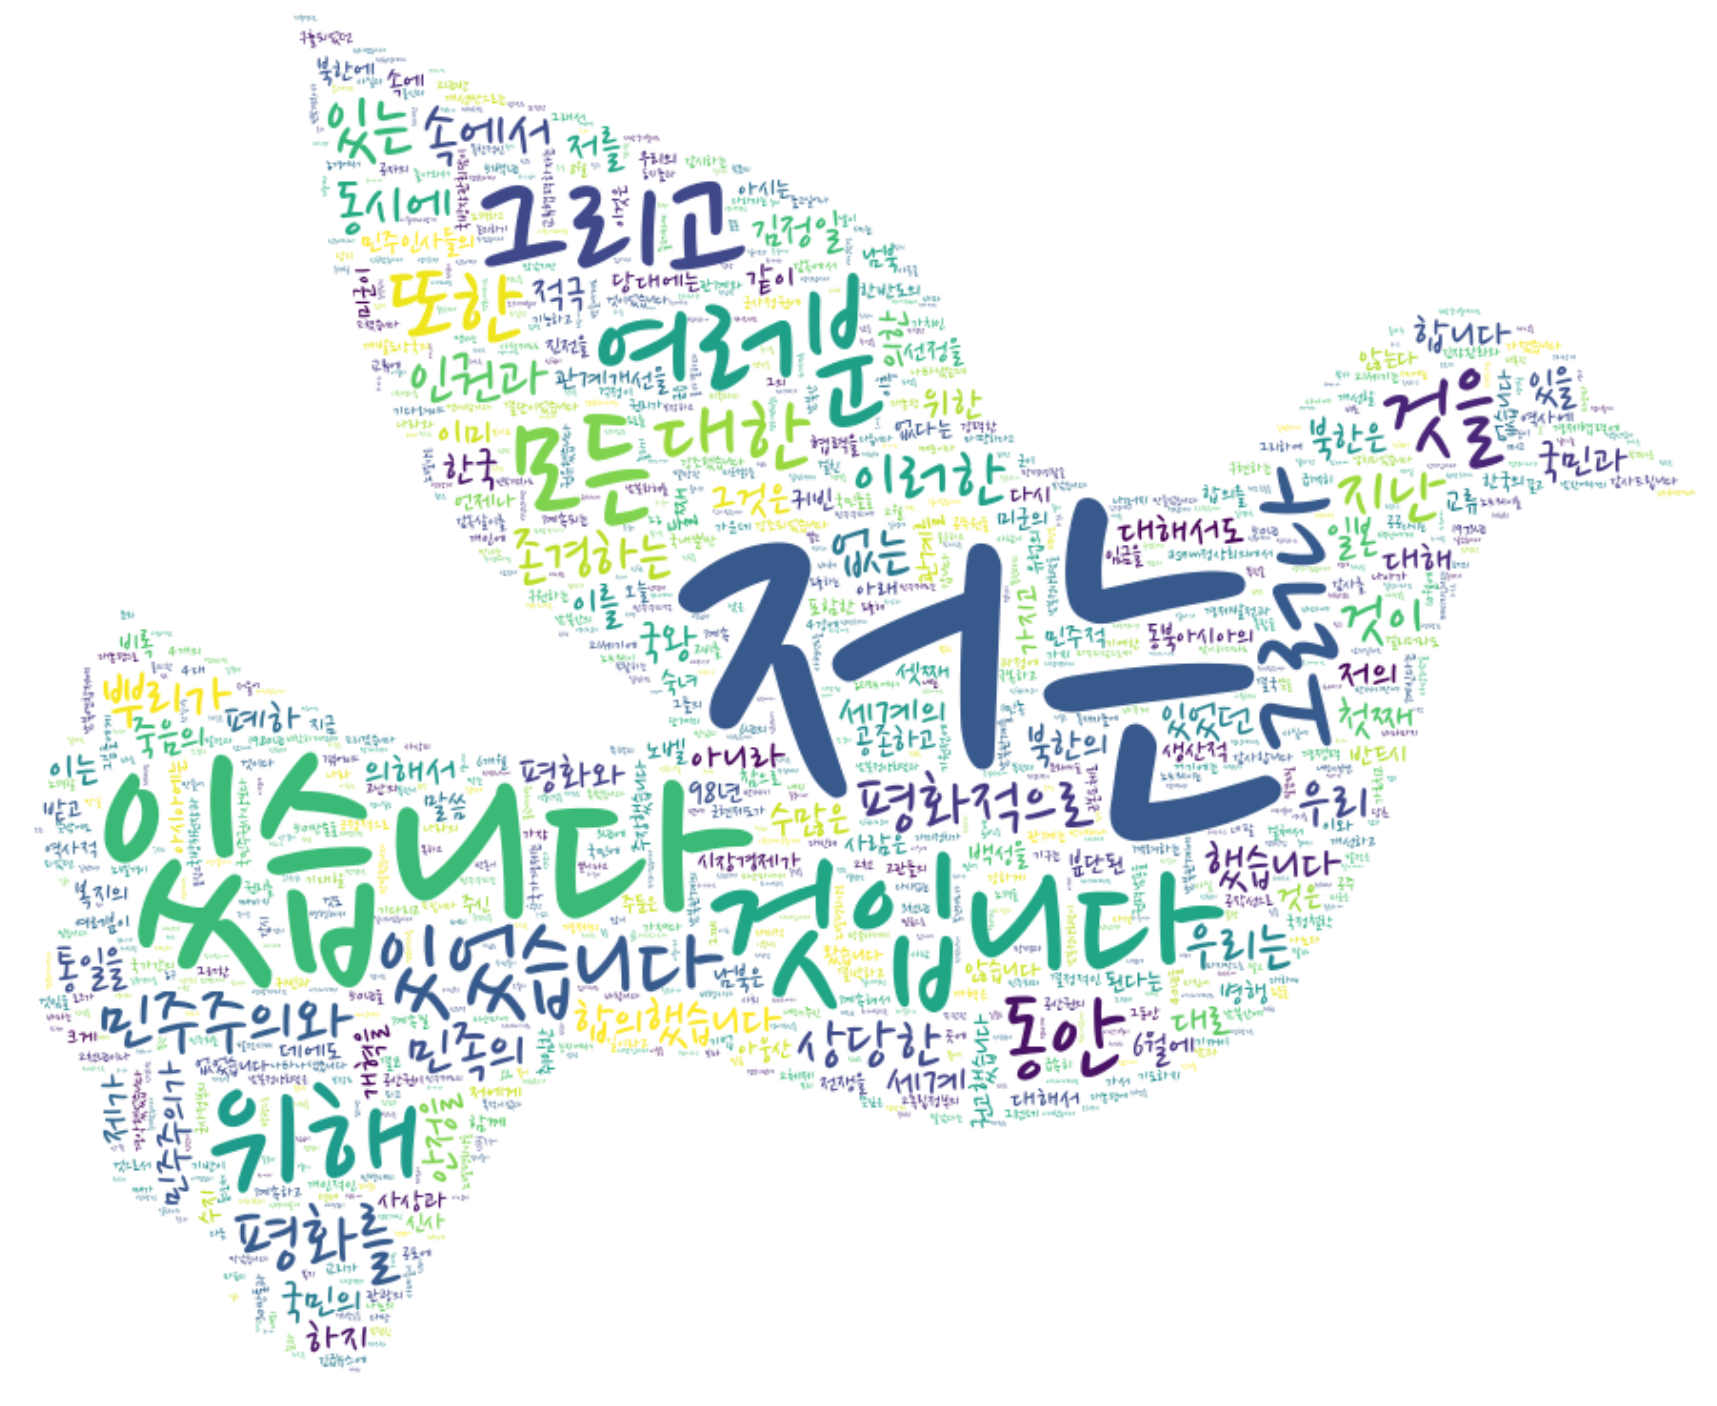

In [36]:
# 연설문 1
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict1)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("daeSpeech.png") # 그림파일로 추출하기


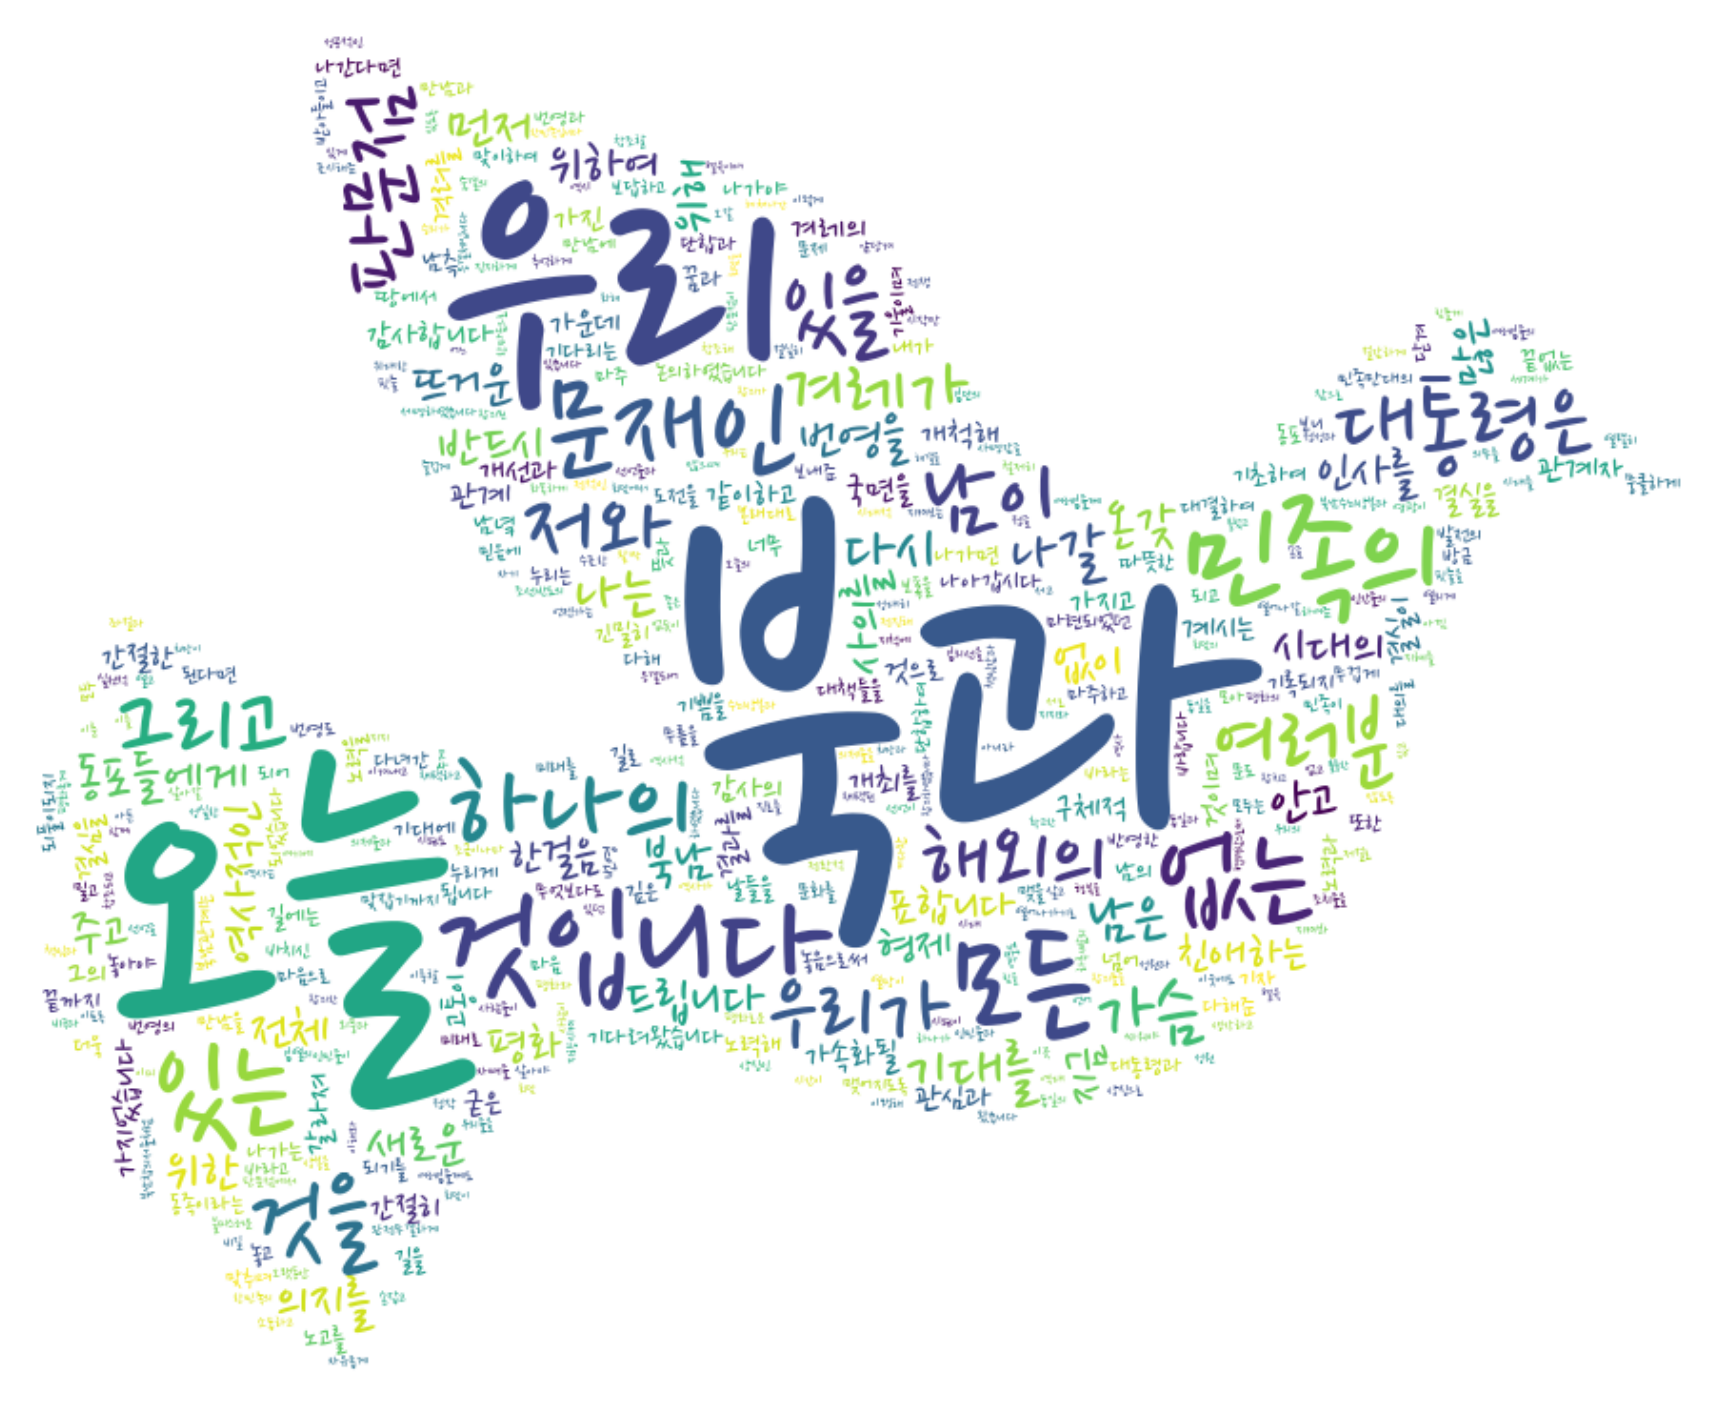

In [35]:
# 연설문 2
icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=mask,
               max_font_size=300, random_state=42).generate_from_frequencies(tf_word_dict2)

plt.figure(figsize=(30, 90))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
wc.to_file("KimSpeech.png") # 그림파일로 추출하기